In [ ]:
#importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data
df = pd.read_csv('Walmart DataSet.csv')

In [ ]:
# checking first 5 rows
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# checking null values
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
# cheking duplicated values
df.duplicated().sum()

0

In [ ]:
# data statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [ ]:
# converting data column type to datetime
df['Date'] = pd.to_datetime(df['Date'],format="mixed")
df['Date'].dtype

dtype('<M8[ns]')

In [ ]:
cols = ['Store','Temperature','Fuel_Price','CPI','Unemployment']

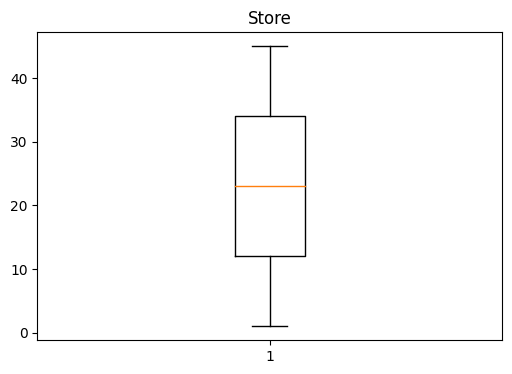

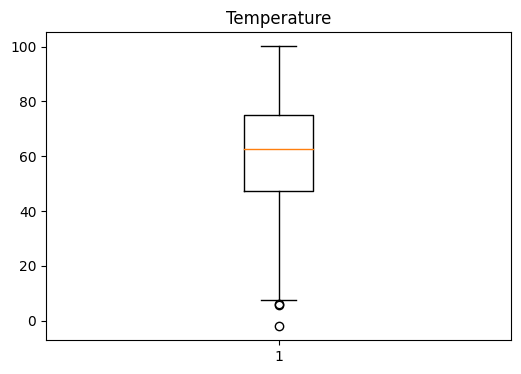

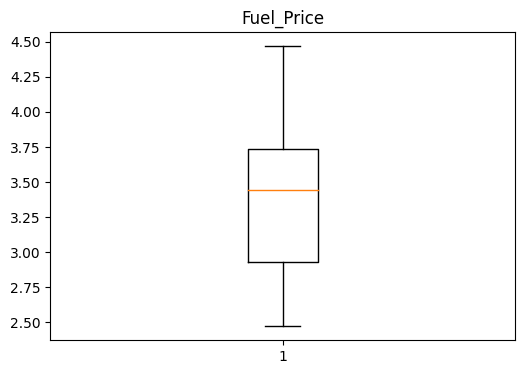

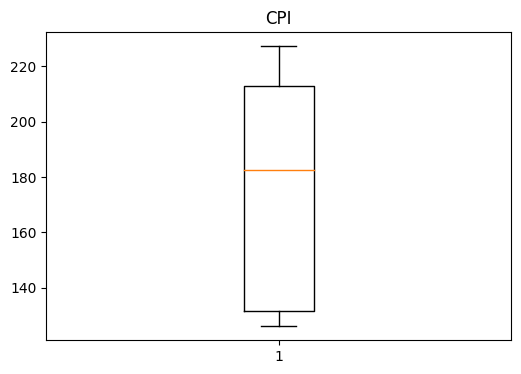

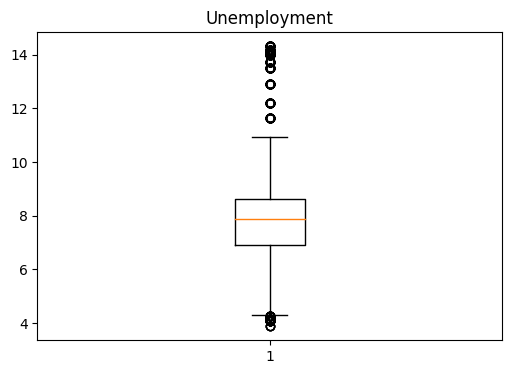

In [ ]:
# Box plot for Outliers
for i in cols:
  plt.figure(figsize=(6,4))
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

In [ ]:
def remove_outliers(df,columns):
  for i in columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
  return df

In [ ]:
df= remove_outliers(df,cols)

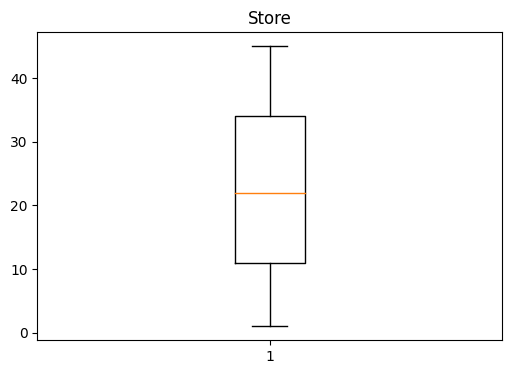

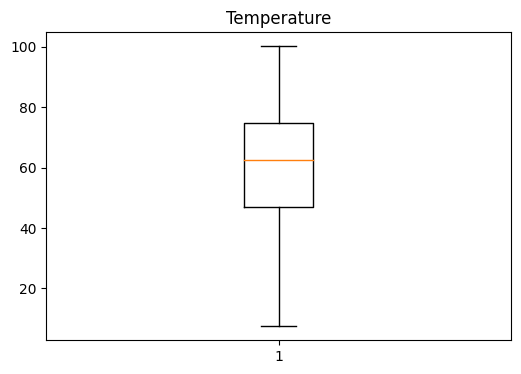

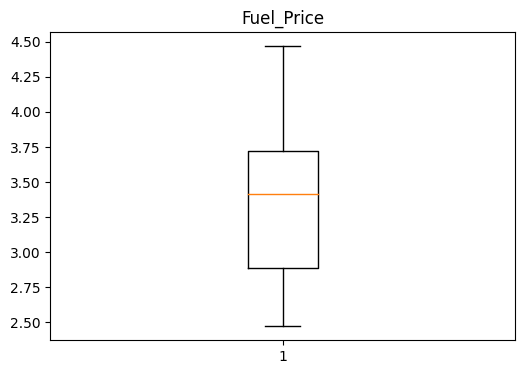

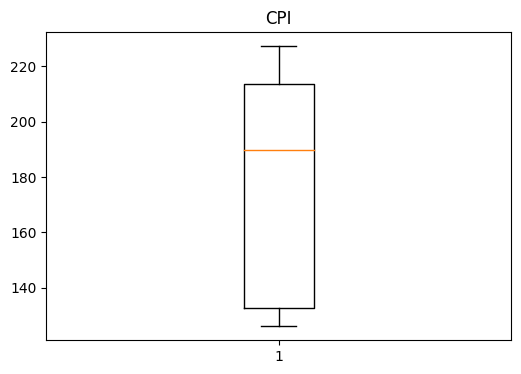

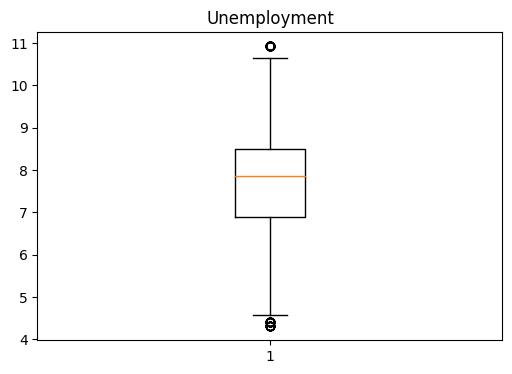

In [ ]:
for i in cols:
  plt.figure(figsize=(6,4))
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

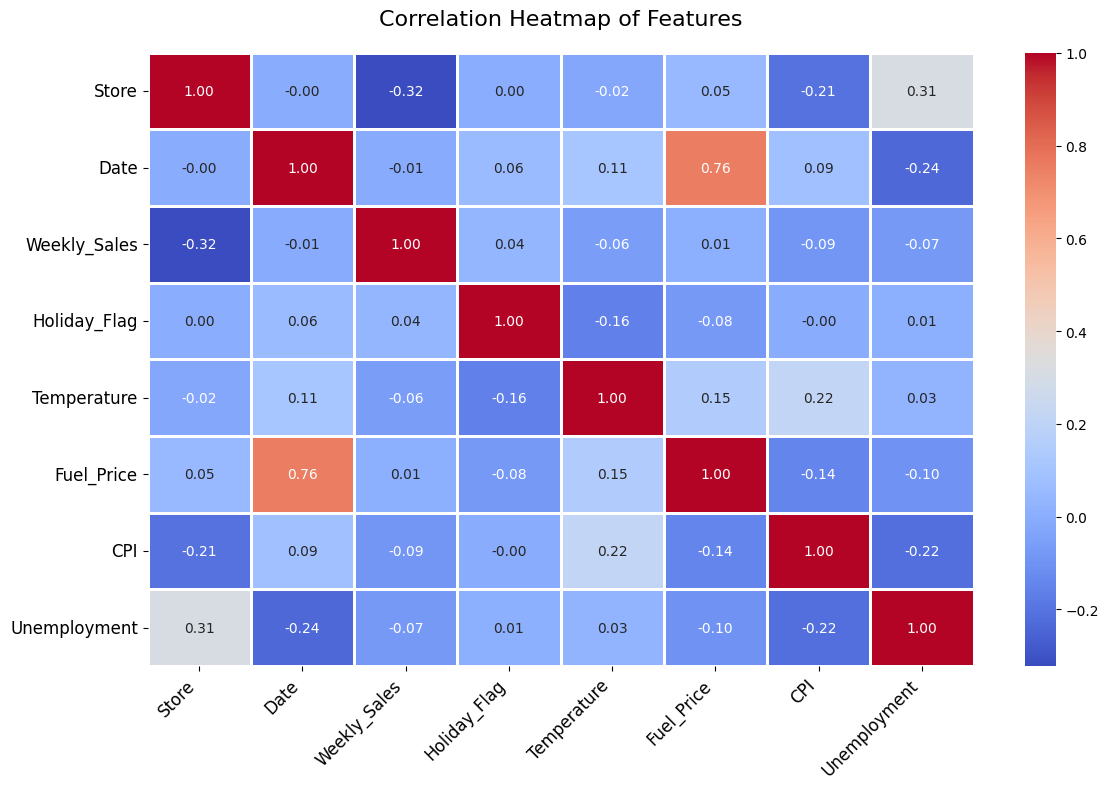

In [ ]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt=".2f",linewidths=1.0)
plt.title('Correlation Heatmap of Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
store_correlations = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[:,1].sort_values(ascending=True)
store_correlations.head()

,,Unemployment
Store,,
44,Weekly_Sales,-0.780076
39,Weekly_Sales,-0.384681
42,Weekly_Sales,-0.356355
4,Weekly_Sales,-0.354789
41,Weekly_Sales,-0.350630


**The most negatively affected by unemployment is Store 38 with a correlation of -0.785290.**

Correlation between Temperature and Weekly Sales: -0.06


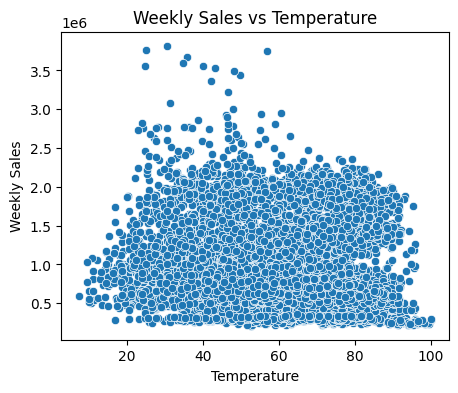

In [ ]:
# Does temperature affect the weekly sales in any manner?

temp_sales_corr = df['Temperature'].corr(df['Weekly_Sales'])

print(f"Correlation between Temperature and Weekly Sales: {temp_sales_corr:.2f}")

plt.figure(figsize=(5, 4))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

Correlation between Temperature and Weekly Sales: -0.06,Temperature is affecting the Weekly Sales.

<Axes: >

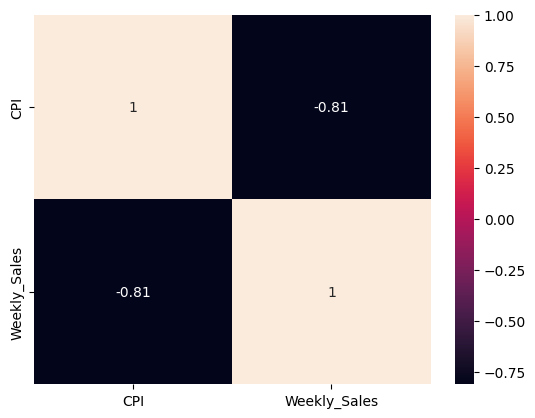

In [ ]:
# How is the Consumer Price index affecting the weekly sales of various stores?
df_cpi_sales = df.groupby('CPI')['Weekly_Sales'].sum().reset_index()
df_cpi_sales.correlation = df_cpi_sales.corr()
sns.heatmap(df_cpi_sales.corr(),annot=True)

there is a nagative correlation between the CPI and weekly sales, Yes there is a Nagative correlation and the CPI is affecting the Weekly Sales

In [ ]:
# Top performing stores according to the historical data.
weekly_store_sales = df.groupby('Store')[['Weekly_Sales']].sum().sort_values(by='Weekly_Sales',ascending=False)
weekly_store_sales=weekly_store_sales.reset_index()
weekly_store_sales

,Store,Weekly_Sales
0,20,3.013978e+08
1,14,2.889999e+08
2,13,2.865177e+08
3,2,2.753824e+08
4,10,2.716177e+08
5,4,2.631574e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


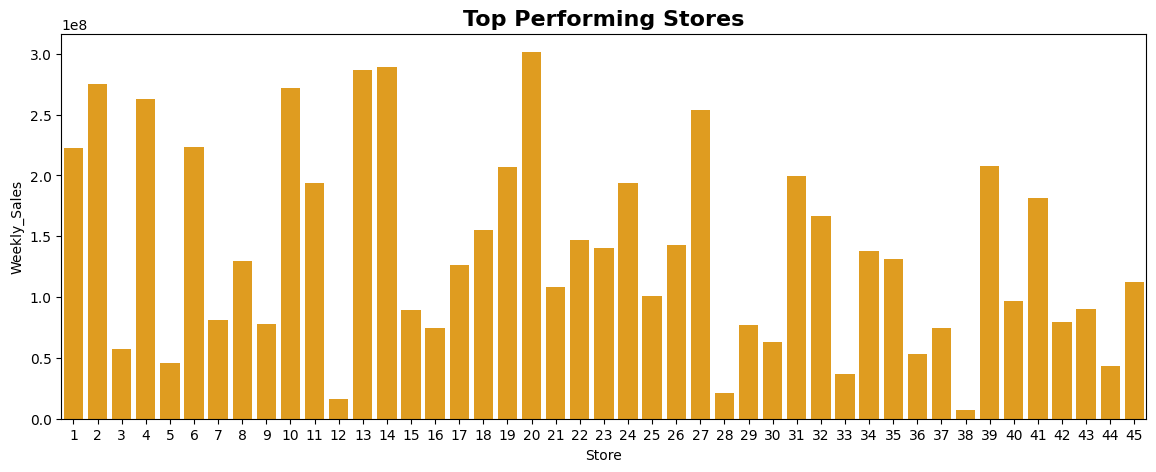

In [ ]:
#Top performing stores according to the historical data.
plt.figure(figsize=(14,5))
sns.barplot(x=weekly_store_sales['Store'],y=weekly_store_sales['Weekly_Sales'],color='orange')
plt.title('Top Performing Stores',fontsize=16,fontweight='bold')
plt.show()

**The Stores 20 is  having the highest sales in stores segment**

**The Stores 38 is having the Lowest sales in stores segment**

In [ ]:
# Date V/S Weekly Sales
df['Date'] = pd.to_datetime(df['Date'])
df_date_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index().sort_values(by='Date',ascending=True)
df_date_sales.head()

,Date,Weekly_Sales
0,2010-01-10,39825602.62
1,2010-02-04,47601520.01
2,2010-02-07,46204385.56
3,2010-02-19,45363033.79
4,2010-02-26,41043557.90


In [ ]:
df_date_sales.shape

(143, 2)

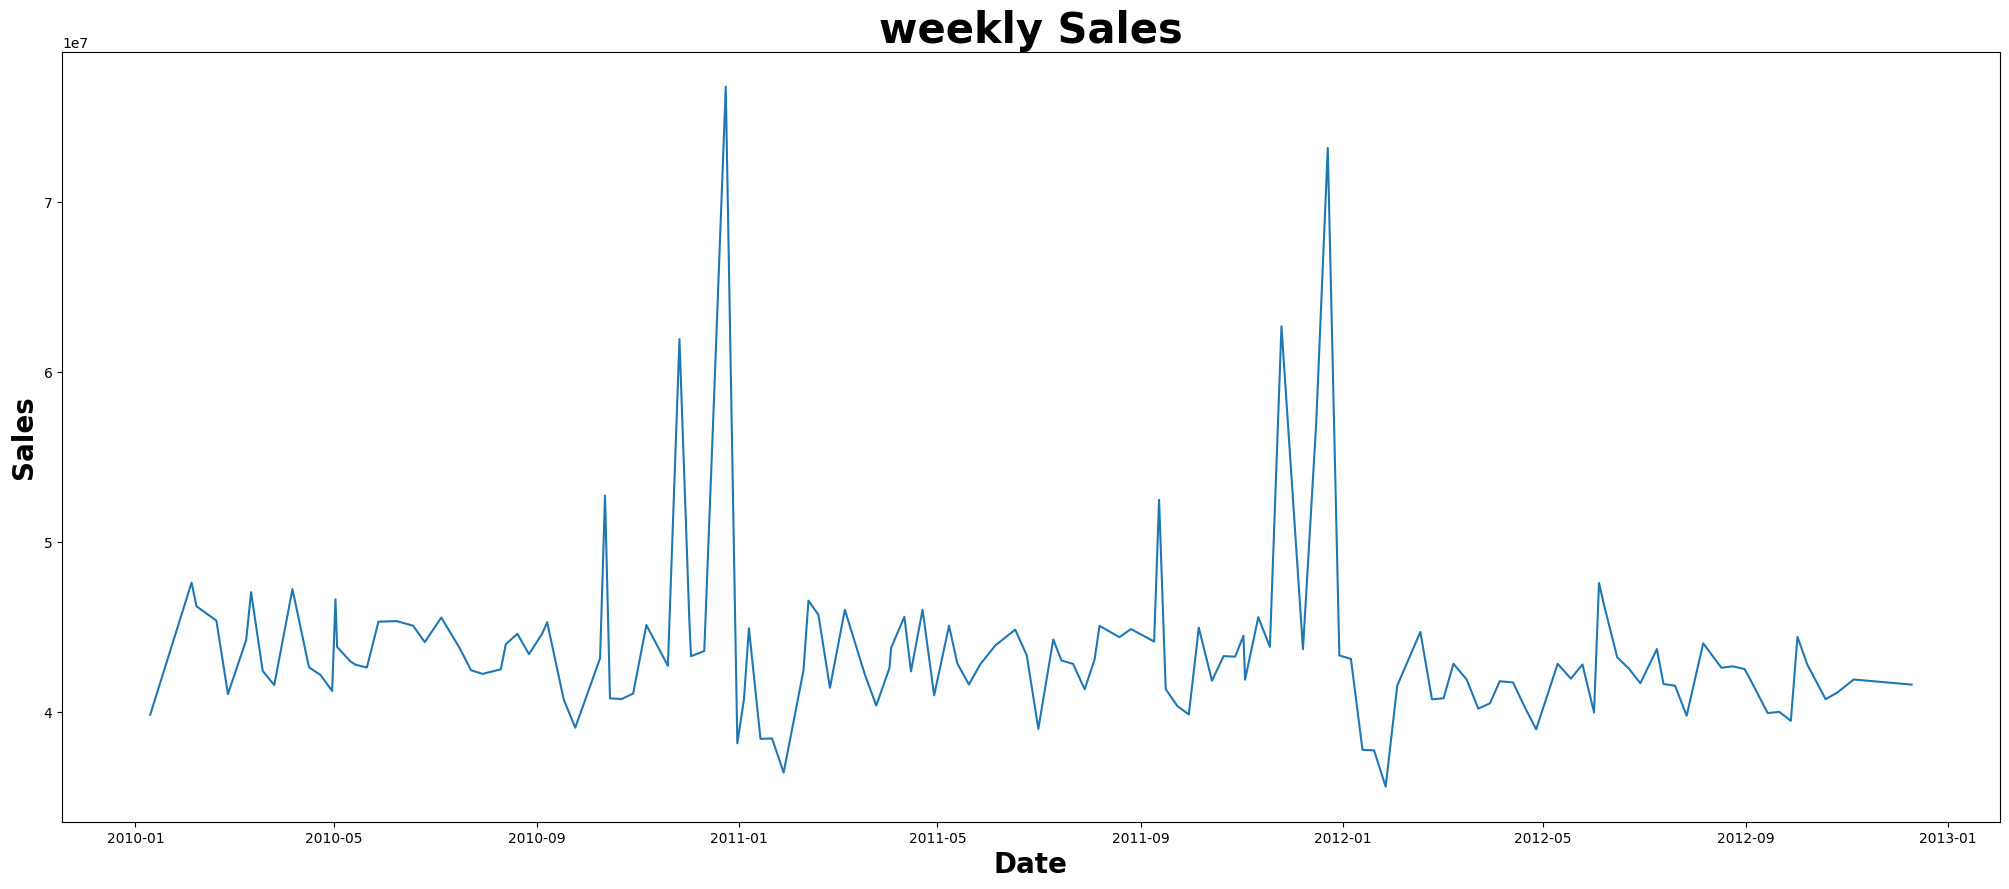

In [ ]:
# plotting the line plot for checking the trend of weekly sales
plt.figure(figsize=(25,10))
sns.lineplot(x='Date',y='Weekly_Sales',data=df_date_sales)
plt.title('weekly Sales',fontsize=30,fontweight='bold')
plt.xlabel('Date',fontsize=20,fontweight='bold')
plt.ylabel('Sales',fontsize=20,fontweight='bold')
plt.show()

# Inference:
**Weekly Sales Most Of Week Are Consolidating expect some quarters**

In [ ]:
df['Quarter'] = df['Date'].dt.to_period('Q')
df_quarter_sales = df.groupby('Quarter')['Weekly_Sales'].sum().reset_index()
df_quarter_sales

,Quarter,Weekly_Sales
0,2010Q1,3.952710e+08
1,2010Q2,5.718002e+08
2,2010Q3,5.181008e+08
3,2010Q4,6.739772e+08
4,2011Q1,5.036055e+08
5,2011Q2,5.656803e+08
6,2011Q3,6.059234e+08
7,2011Q4,6.288534e+08
8,2012Q1,4.873672e+08
9,2012Q2,5.516230e+08


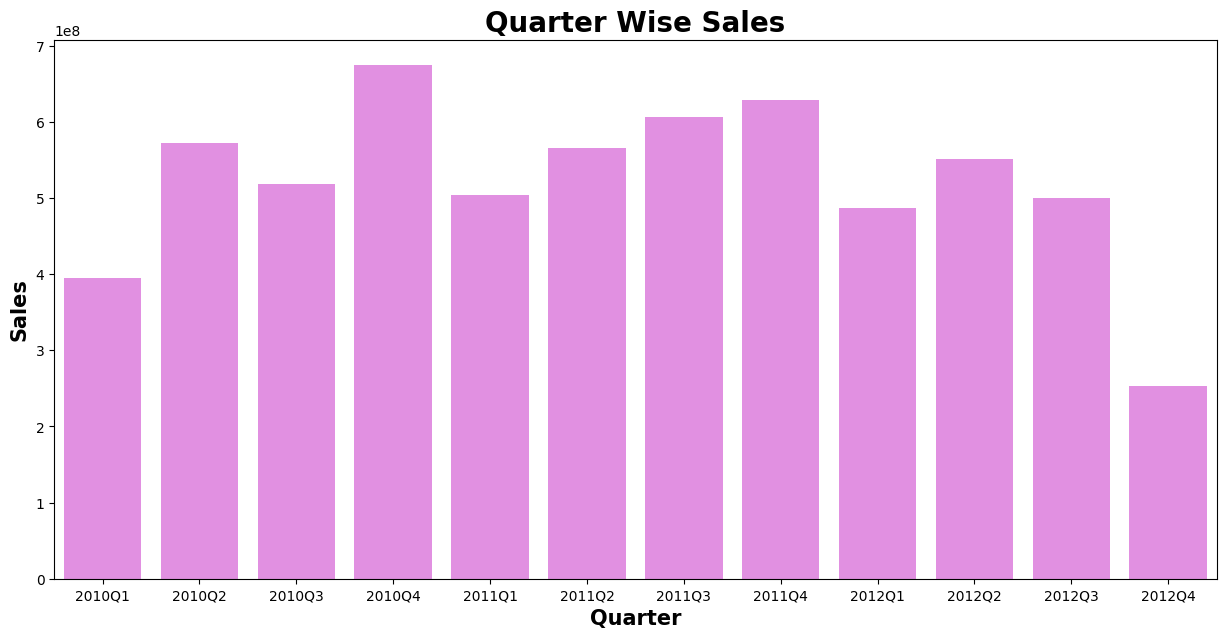

In [ ]:
# Quarter Wise Sales
plt.figure(figsize=(15,7))
sns.barplot(x='Quarter',y='Weekly_Sales',data=df_quarter_sales,color='violet')
plt.title('Quarter Wise Sales',fontsize=20,fontweight='bold')
plt.xlabel('Quarter',fontsize=15,fontweight='bold')
plt.ylabel('Sales',fontsize=15,fontweight='bold')
plt.show()

# Inference:
* In 2010 the Q2,Q4 Performed well
* In 2011 also perofomnce is continued and Q4 is in peak sales
* In 2012 the perofomnce got distrubed and Q2 Sales are high and Q4 is turned in very bad performance comparing all 3 years

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q2


In [ ]:
# Holidays Sales
df_holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
df_holiday_sales

,Holiday_Flag,Weekly_Sales
0,0,5.783327e+09
1,1,4.712370e+08


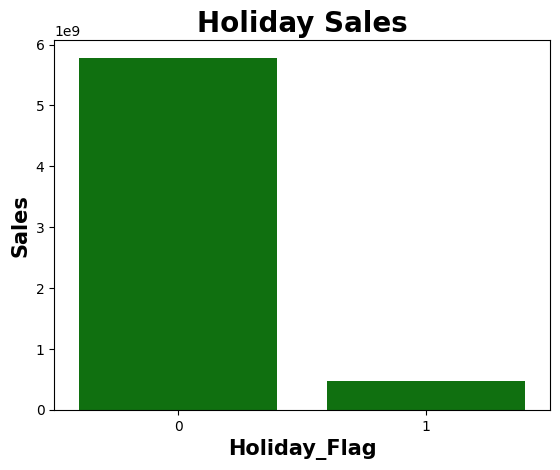

In [ ]:
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=df_holiday_sales,color='green')
plt.title('Holiday Sales',fontsize=20,fontweight='bold')
plt.xlabel('Holiday_Flag',fontsize=15,fontweight='bold')
plt.ylabel('Sales',fontsize=15,fontweight='bold')
plt.show()

**The Sales are High In Normal Days.**

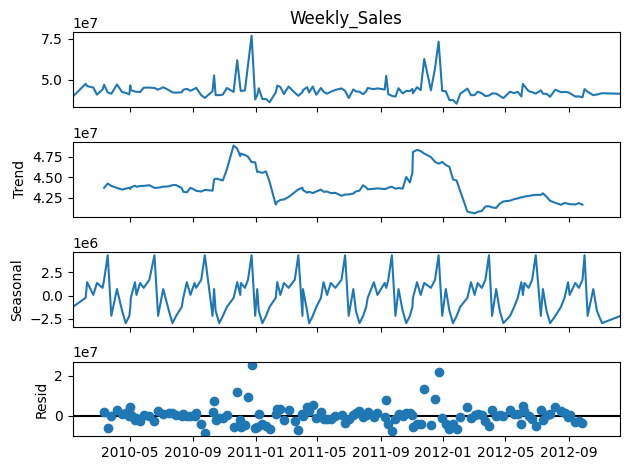

In [ ]:
# If the weekly sales show a seasonal trend, when and what could be the reason?
df_stores_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_stores_sales.set_index('Date',inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose
sales_decomposition = seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)
sales_decomposition.plot()
plt.show()

**As we can see in trend component there is seasonal spikes from 2010-09th month uoto 2011-01,then after again 2011-09th month to 2012-01 there is a second seasonal spike, but in 2012 year there is no that much spike.**

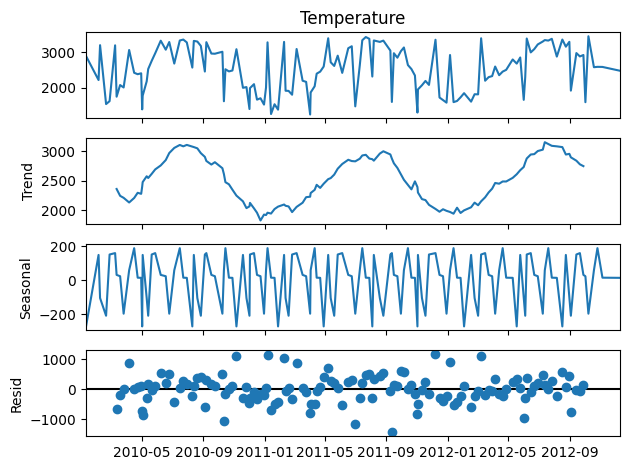

In [ ]:
df_temperature = df.groupby('Date')['Temperature'].sum().reset_index()
df_temperature.set_index('Date',inplace=True)
temperature_decomposition = seasonal_decompose(df_temperature['Temperature'],period=13)
temperature_decomposition.plot()
plt.show()

In the Weekly Sales Data, there is a noticeable increase in sales starting from September 2010, followed by a seasonal upward trend until January 2011. Afterward, the sales stabilize, eventually transitioning to a downward trend. This pattern is repeated from September 2011 to January 2012.

## Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q2


In [ ]:
df_stores_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_stores_sales.set_index('Date',inplace=True)
df_stores_sales.head()

,Weekly_Sales
Date,
2010-01-10,39825602.62
2010-02-04,47601520.01
2010-02-07,46204385.56
2010-02-19,45363033.79
2010-02-26,41043557.90


In [ ]:
# Adafuller
from statsmodels.tsa.stattools import adfuller

In [ ]:
# check stationarity
def adf_test(series):
  result = adfuller(series,autolag='AIC')
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  out = pd.Series(data=result[0:4],index=labels)
  for key,val in result[4].items():
    out[f'critical value ({key})'] = val

  print(out.to_string())
  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary')


In [ ]:
adf_test(df_stores_sales['Weekly_Sales'])

ADF Test Statistic            -9.247825e+00
p-value                        1.520477e-15
#Lags Used                     0.000000e+00
Number of Observations Used    1.420000e+02
critical value (1%)           -3.477262e+00
critical value (5%)           -2.882118e+00
critical value (10%)          -2.577743e+00
The series is stationary


In [ ]:
from statsmodels.tsa.seasonal import  seasonal_decompose

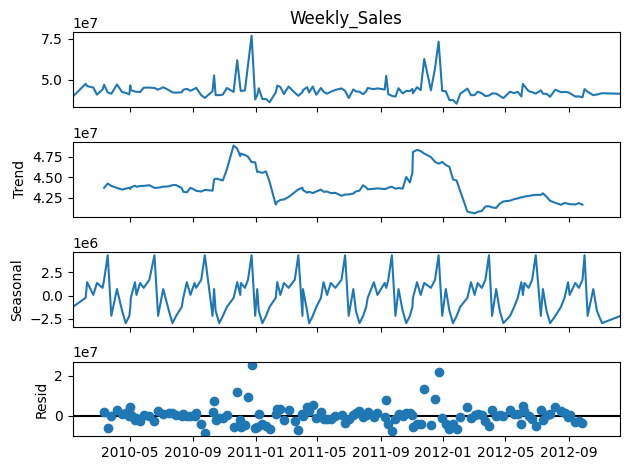

In [ ]:
decomposition = seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)
decomposition.plot()
plt.show()

In [ ]:
# creating rolling mean & rolling standard deviation
df_stores_sales['Rolling_Mean'] = df_stores_sales['Weekly_Sales'].rolling(window=10).mean()
df_stores_sales['Rolling_Std'] = df_stores_sales['Weekly_Sales'].rolling(window=10).std()

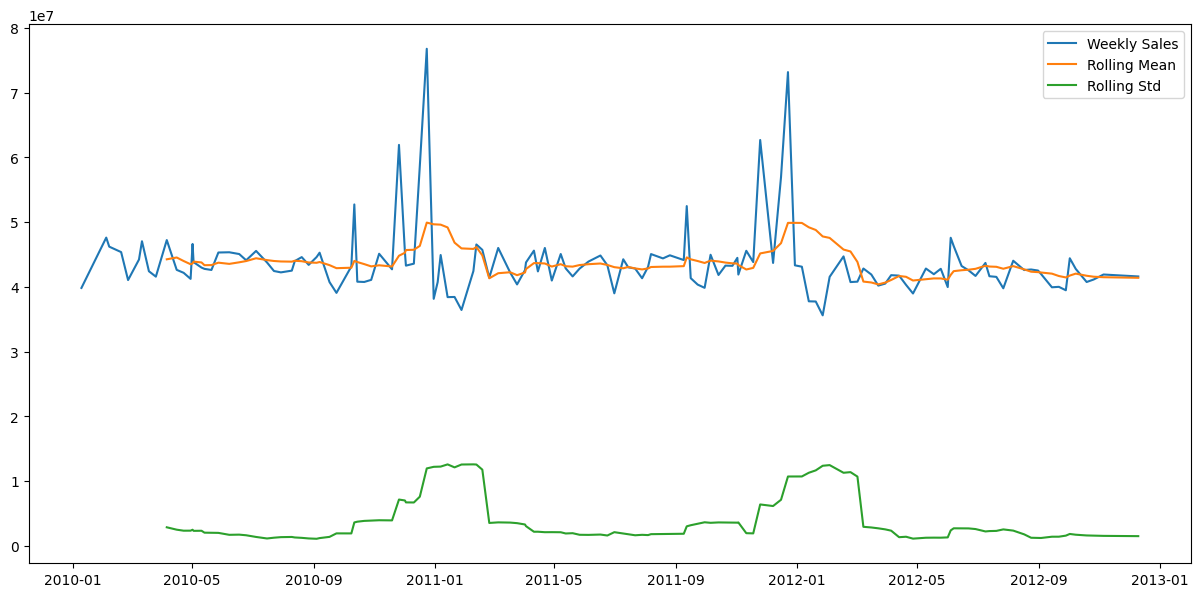

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df_stores_sales['Weekly_Sales'],label='Weekly Sales')
plt.plot(df_stores_sales['Rolling_Mean'],label='Rolling Mean')
plt.plot(df_stores_sales['Rolling_Std'],label='Rolling Std')
plt.legend()
plt.show()


**Mean and Sales are almost close but the mean is not capturing the seasonal spikes**

In [ ]:
df_log = np.log(df_stores_sales['Weekly_Sales'])
df_log.head()

,Weekly_Sales
Date,
2010-01-10,17.500021
2010-02-04,17.678375
2010-02-07,17.648585
2010-02-19,17.630208
2010-02-26,17.530144


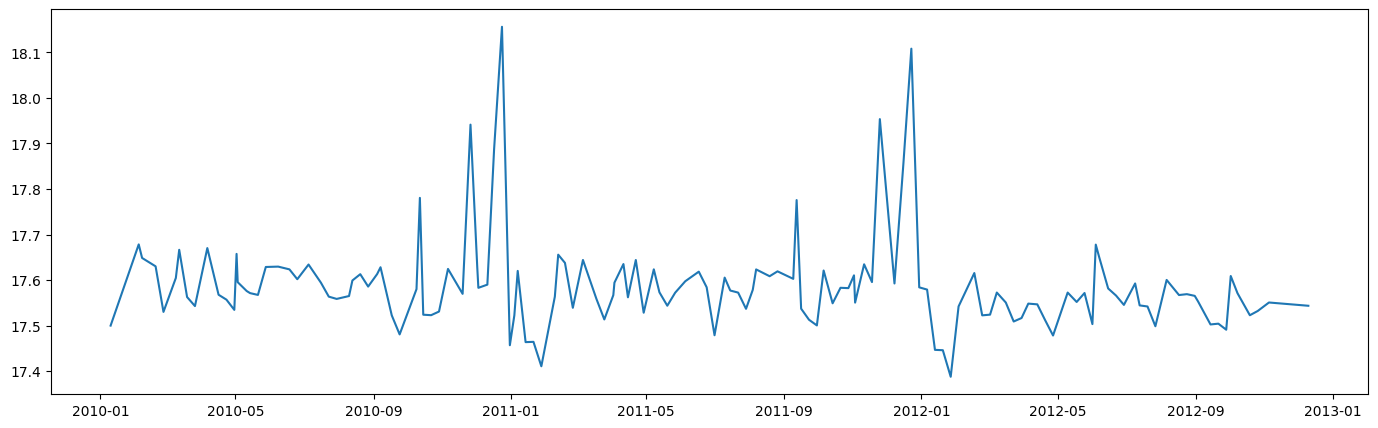

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(df_log)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

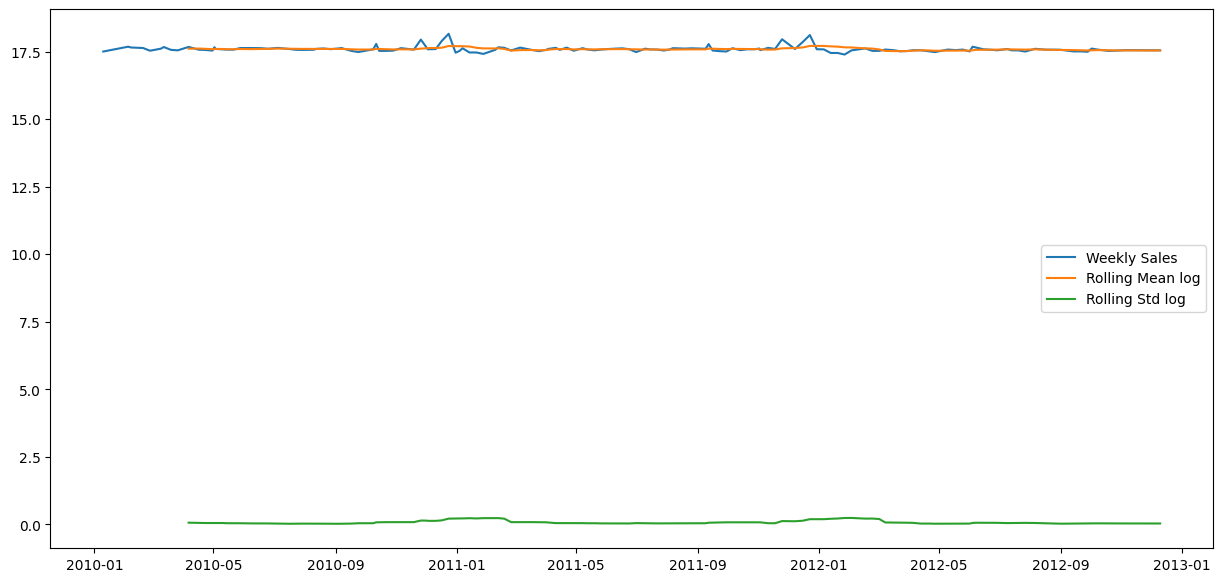

In [ ]:
mean_log = df_log.rolling(window=10).mean()
std_log = df_log.rolling(window=10).std()
plt.figure(figsize=(15,7))
plt.plot(df_log,label='Weekly Sales')
plt.plot(mean_log,label='Rolling Mean log')
plt.plot(std_log,label='Rolling Std log')
plt.legend()
plt

In [ ]:
df_new = df_log - mean_log
df_new.head(10)

,Weekly_Sales
Date,
2010-01-10,NaN
2010-02-04,NaN
2010-02-07,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-09,NaN
2010-03-12,NaN
2010-03-19,NaN
2010-03-26,NaN


In [ ]:
df_new.dropna(inplace=True) # dropping the nan values

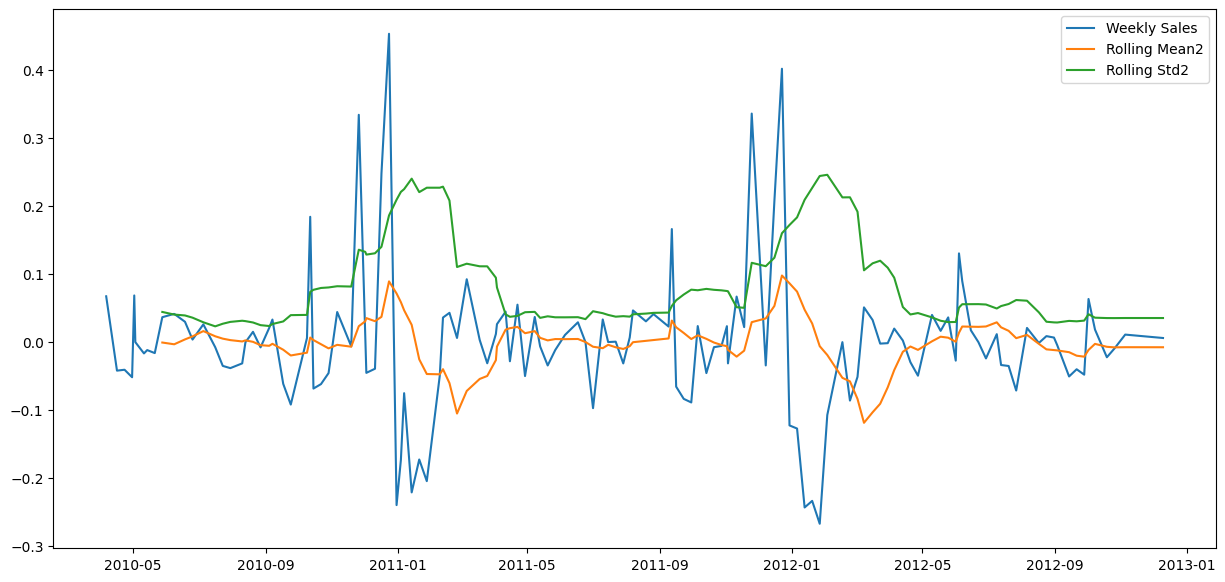

In [ ]:
# after the log transformation checking rolling statistics
mean2 = df_new.rolling(window=10).mean()
std2 = df_new.rolling(window=10).std()
plt.figure(figsize=(15,7))
plt.plot(df_new,label='Weekly Sales')
plt.plot(mean2,label='Rolling Mean2')
plt.plot(std2,label='Rolling Std2')
plt.legend()

In [ ]:
adf_test(df_new)

ADF Test Statistic            -8.660368e+00
p-value                        4.840924e-14
#Lags Used                     0.000000e+00
Number of Observations Used    1.330000e+02
critical value (1%)           -3.480500e+00
critical value (5%)           -2.883528e+00
critical value (10%)          -2.578496e+00
The series is stationary


In [ ]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(df_new)
lag_pacf = pacf(df_new)

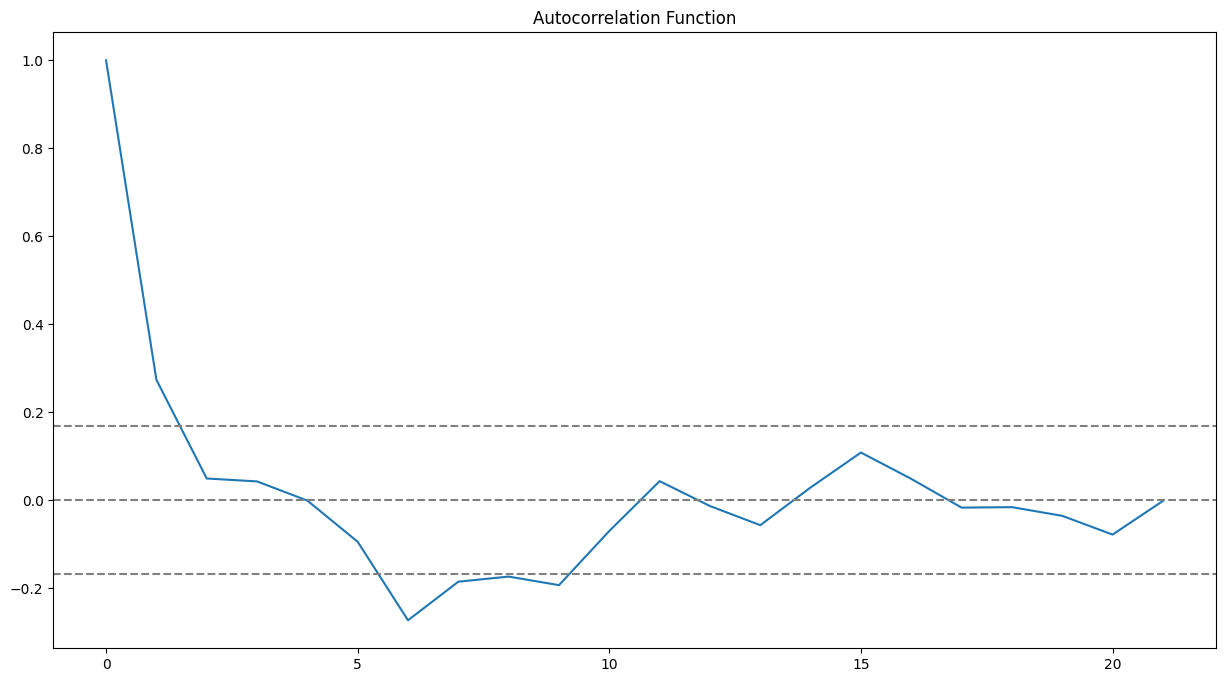

In [ ]:
# plot Acf
plt.figure(figsize=(15,8))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

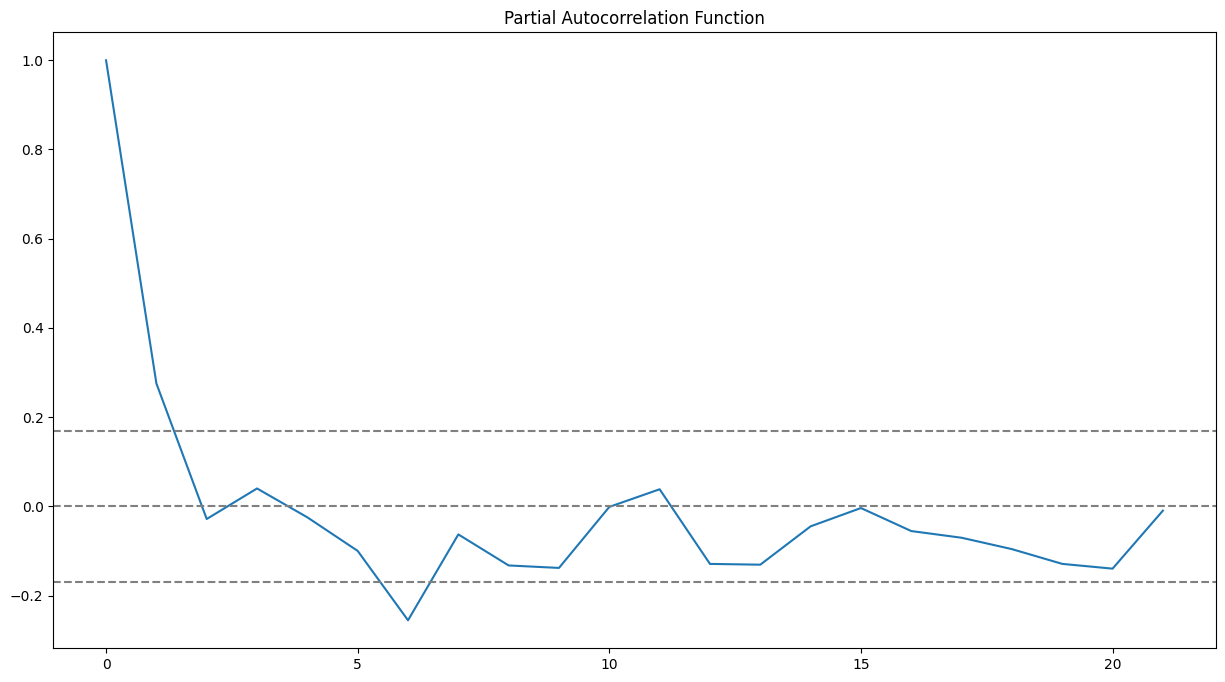

In [ ]:
# plot PAcf
plt.figure(figsize=(15,8))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

# got P values as 5 and q  value as 3

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(df_new,order=(5,1,3))
model = arima.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  134
Model:                 ARIMA(5, 1, 3)   Log Likelihood                 118.368
Date:                Fri, 13 Sep 2024   AIC                           -218.736
Time:                        14:29:06   BIC                           -192.722
Sample:                             0   HQIC                          -208.165
                                - 134                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8608      0.635     -1.356      0.175      -2.105       0.384
ar.L2         -0.3960      0.528     -0.751      0.453      -1.430       0.638
ar.L3          0.2063      0.191      1.083      0.279      -0.167       0.580
ar.L4          0.0402      0.136      0.295      0.768      -0.227       0.307
ar.L5          0.1048      0.095      1.109      0.268      -0.080       0.290
ma.L1          0.1600      0.730      0.219      0.826      -1.270       1.590
ma.L2         -0.4475      0.510     -0.878      0.380      -1.446       0.552
ma.L3         -0.6982      0.617     -1.131      0.258      -1.908       0.512
sigma2         0.0096      0.002      4.630      0.000       0.006       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               115.34
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = model.predict()
prediction

,predicted_mean
Date,
2010-04-06,0.000000
2010-04-16,0.066867
2010-04-23,-0.004474
2010-04-30,-0.008261
2010-05-02,-0.022905
...,...
2012-10-08,0.014621
2012-10-19,-0.000919
2012-10-26,-0.006612


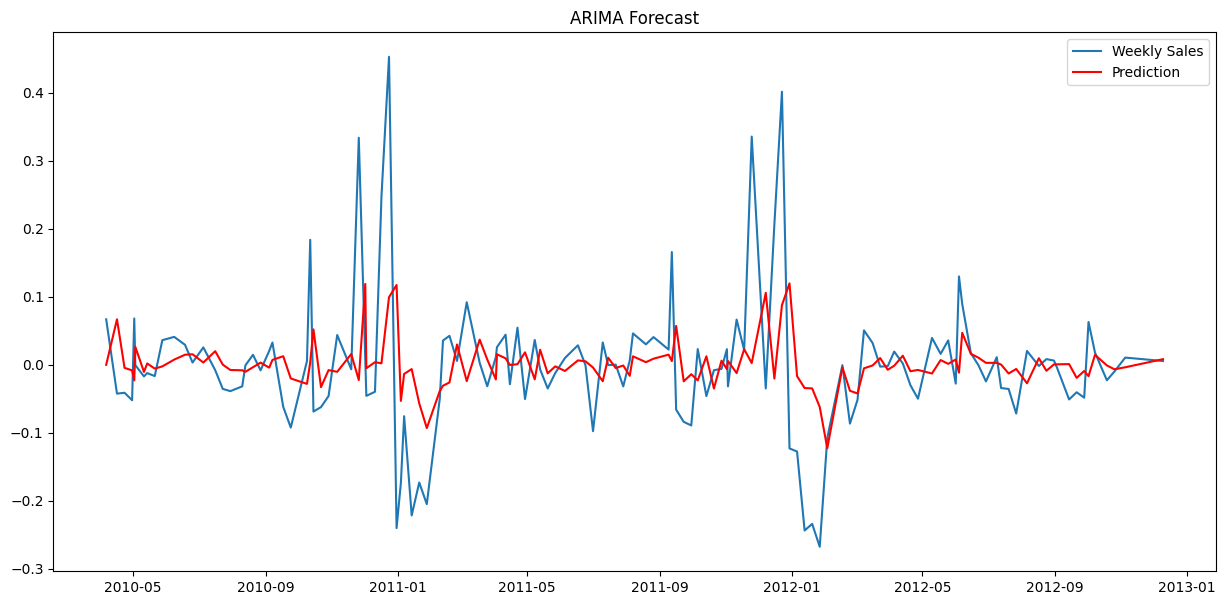

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df_new,label='Weekly Sales')
plt.plot(prediction,color='red', label='Prediction')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_new,prediction)
mse

0.009756162282470256

In [ ]:
rmse = np.sqrt(mse)
rmse

0.09877328729201158

# Store 1 Sales Forecast

In [ ]:
store1_sales = df[df['Store'] == 1].groupby('Date')['Weekly_Sales'].sum().reset_index()
store1_sales.set_index('Date',inplace=True)
store1_sales

,Weekly_Sales
Date,
2010-01-10,1453329.50
2010-02-04,1594968.28
2010-02-07,1492418.14
2010-02-19,1611968.17
2010-02-26,1409727.59
...,...
2012-10-08,1592409.97
2012-10-19,1508068.77
2012-10-26,1493659.74


In [ ]:
adf_test(store1_sales['Weekly_Sales'])

ADF Test Statistic            -9.595634e+00
p-value                        1.981888e-16
#Lags Used                     0.000000e+00
Number of Observations Used    1.420000e+02
critical value (1%)           -3.477262e+00
critical value (5%)           -2.882118e+00
critical value (10%)          -2.577743e+00
The series is stationary


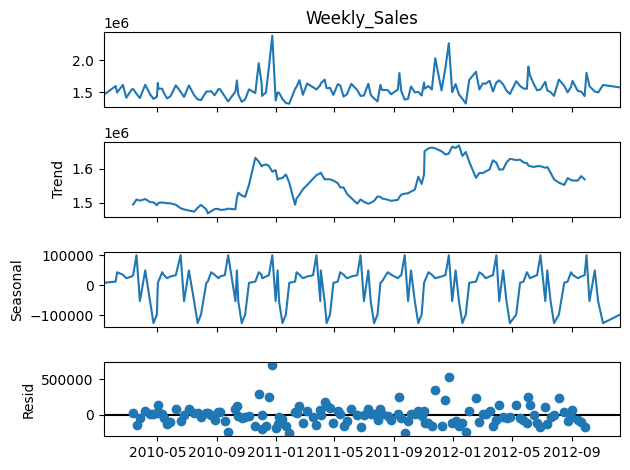

In [ ]:
decompositon = seasonal_decompose(store1_sales['Weekly_Sales'],period=13)
decompositon.plot()
plt.show()

In [ ]:
mean1 = store1_sales['Weekly_Sales'].rolling(window=10).mean()
std1 = store1_sales['Weekly_Sales'].rolling(window=10).std()

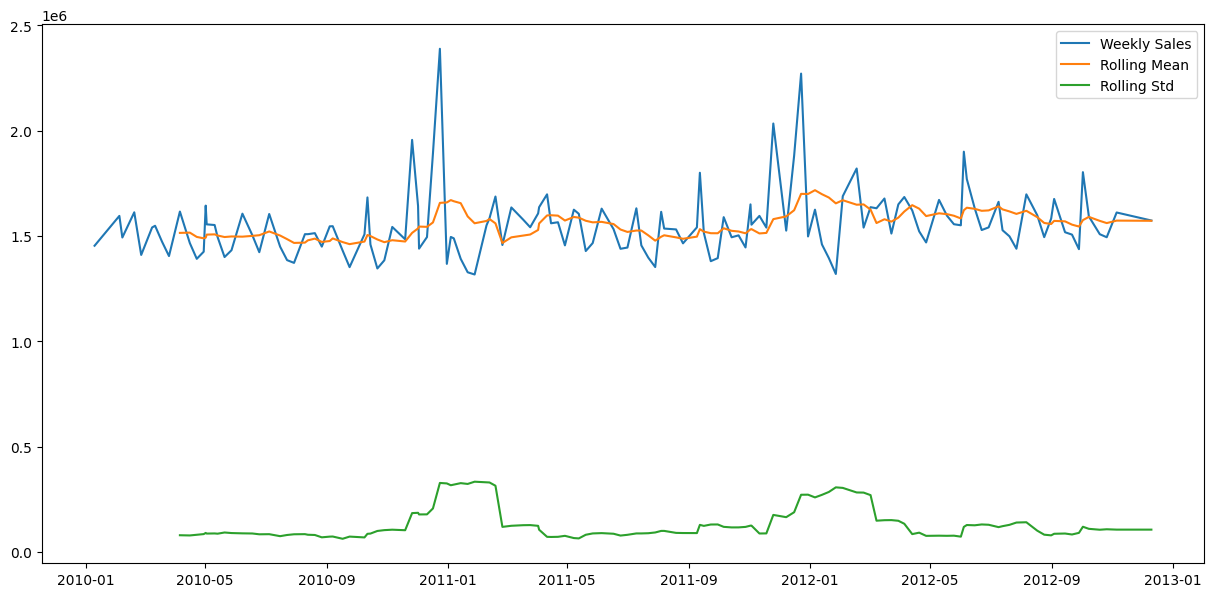

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(store1_sales['Weekly_Sales'],label='Weekly Sales')
plt.plot(mean1,label='Rolling Mean')
plt.plot(std1,label='Rolling Std')
plt.legend()
plt.show()

In [ ]:
df_log = np.log(store1_sales['Weekly_Sales'])
df_log.head()

,Weekly_Sales
Date,
2010-01-10,14.189368
2010-02-04,14.282364
2010-02-07,14.215908
2010-02-19,14.292966
2010-02-26,14.158907


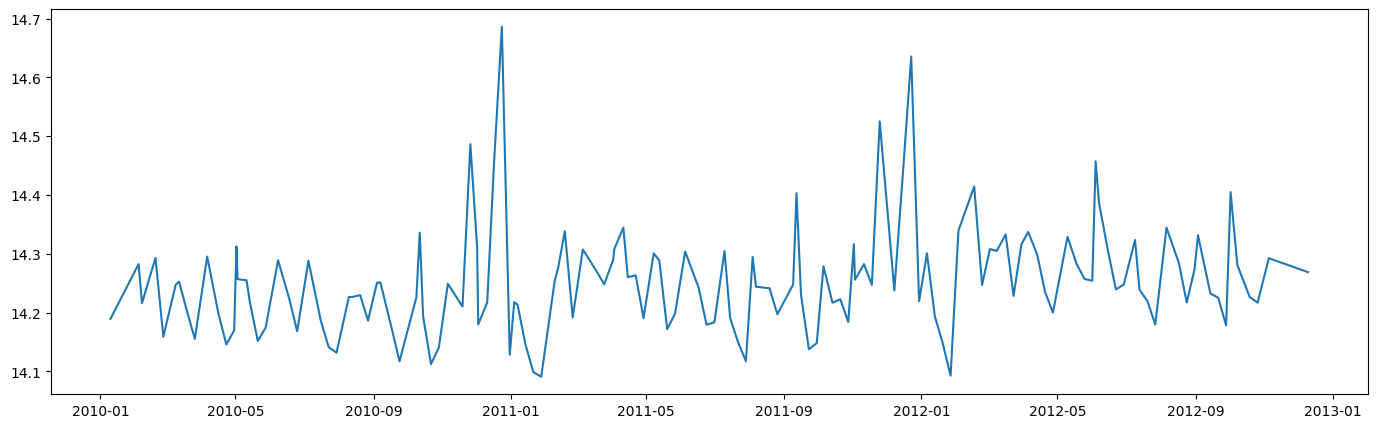

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(df_log)

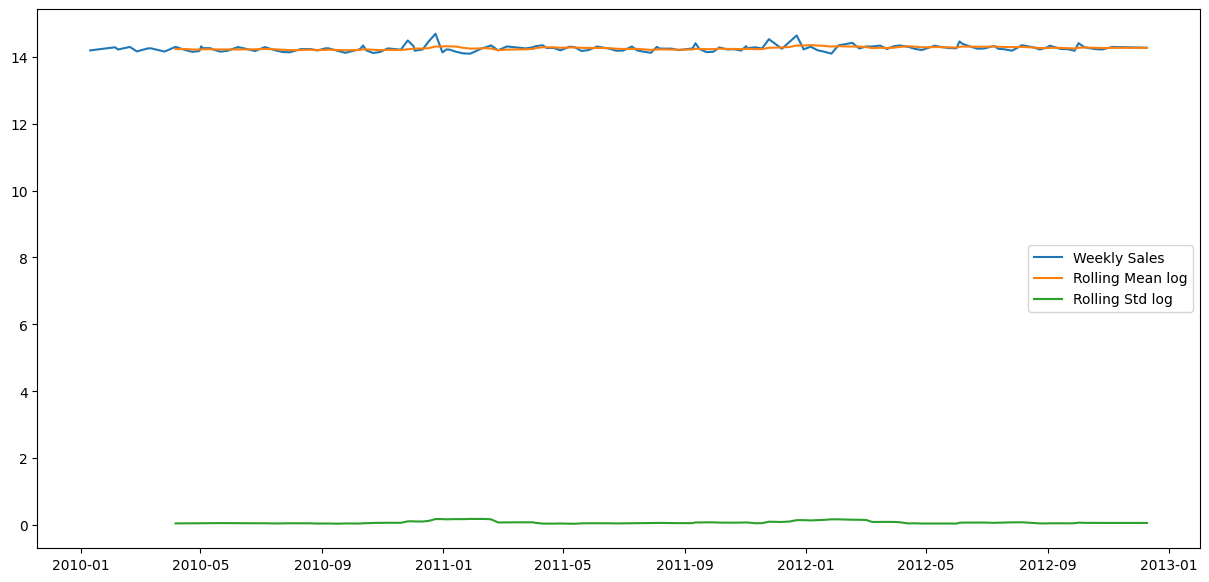

In [ ]:
mean_log = df_log.rolling(window=10).mean()
std_log = df_log.rolling(window=10).std()
plt.figure(figsize=(15,7))
plt.plot(df_log,label='Weekly Sales')
plt.plot(mean_log,label='Rolling Mean log')
plt.plot(std_log,label='Rolling Std log')
plt.legend()

In [ ]:
df_new = df_log - mean_log
df_new.head(10)

,Weekly_Sales
Date,
2010-01-10,NaN
2010-02-04,NaN
2010-02-07,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-09,NaN
2010-03-12,NaN
2010-03-19,NaN
2010-03-26,NaN


In [ ]:
df_new.dropna(inplace=True) # dropping the nan values

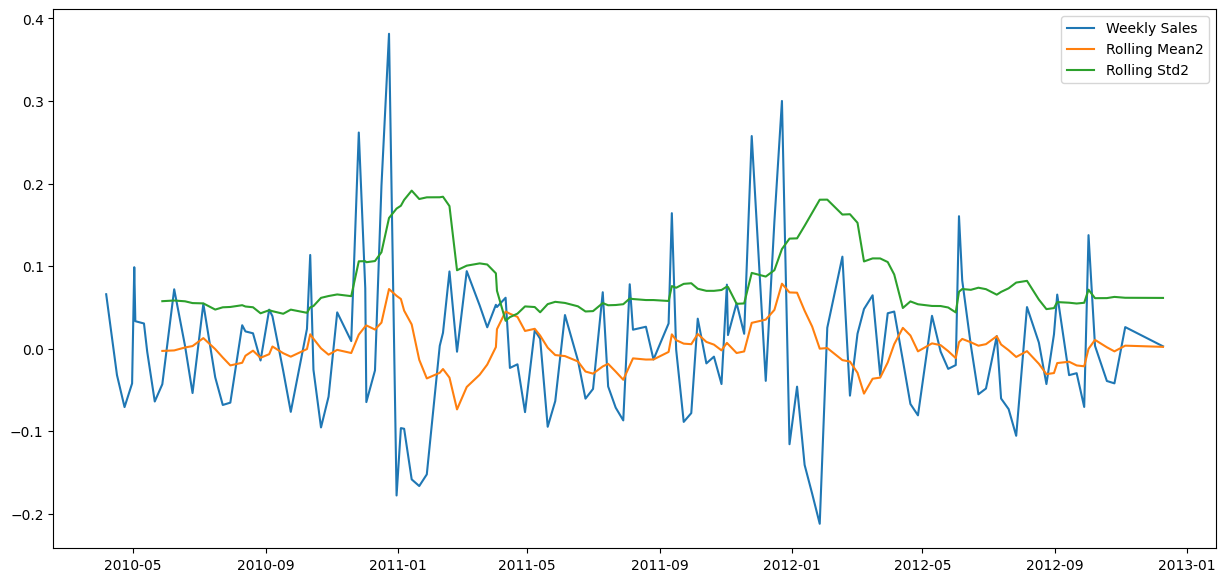

In [ ]:
mean2 = df_new.rolling(window=10).mean()
std2 = df_new.rolling(window=10).std()

plt.figure(figsize=(15,7))
plt.plot(df_new,label='Weekly Sales')
plt.plot(mean2,label='Rolling Mean2')
plt.plot(std2,label='Rolling Std2')
plt.legend()

In [ ]:
adf_test(df_new)

ADF Test Statistic            -6.254118e+00
p-value                        4.381186e-08
#Lags Used                     7.000000e+00
Number of Observations Used    1.260000e+02
critical value (1%)           -3.483346e+00
critical value (5%)           -2.884766e+00
critical value (10%)          -2.579156e+00
The series is stationary


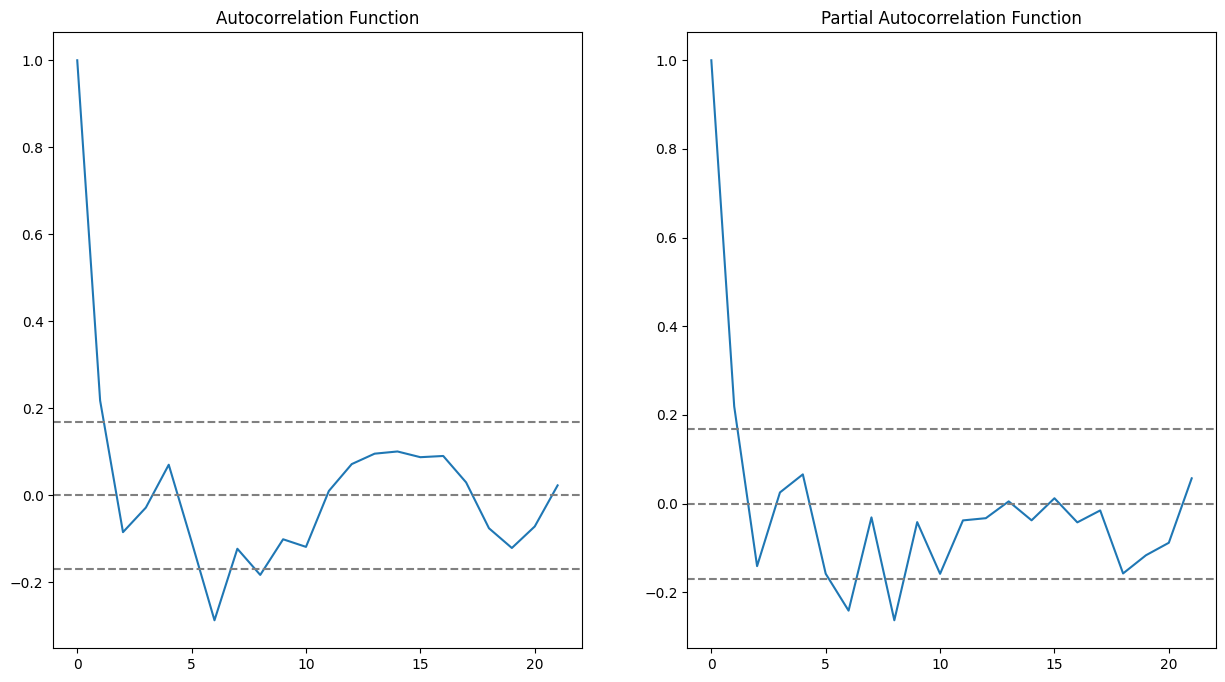

In [ ]:
lag_acf = acf(df_new)
lag_pacf = pacf(df_new)

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()


In [ ]:
p,d,q =2,1,2
model = ARIMA(df_new,order=(p,d,q))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  134
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 136.359
Date:                Fri, 13 Sep 2024   AIC                           -262.717
Time:                        14:30:51   BIC                           -248.266
Sample:                             0   HQIC                          -256.845
                                - 134                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6965      0.086     -8.057      0.000      -0.866      -0.527
ar.L2          0.1470      0.074      1.986      0.047       0.002       0.292
ma.L1         -0.0249      2.835     -0.009      0.993      -5.582       5.532
ma.L2         -0.9744      2.778     -0.351      0.726      -6.420       4.471
sigma2         0.0072      0.020      0.355      0.723      -0.033       0.047
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                31.60
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.78
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = model_fit.predict()
prediction

,predicted_mean
Date,
2010-04-06,0.000000
2010-04-16,0.065950
2010-04-23,0.002344
2010-04-30,-0.018629
2010-05-02,-0.024017
...,...
2012-10-08,0.061929
2012-10-19,-0.035511
2012-10-26,0.027447


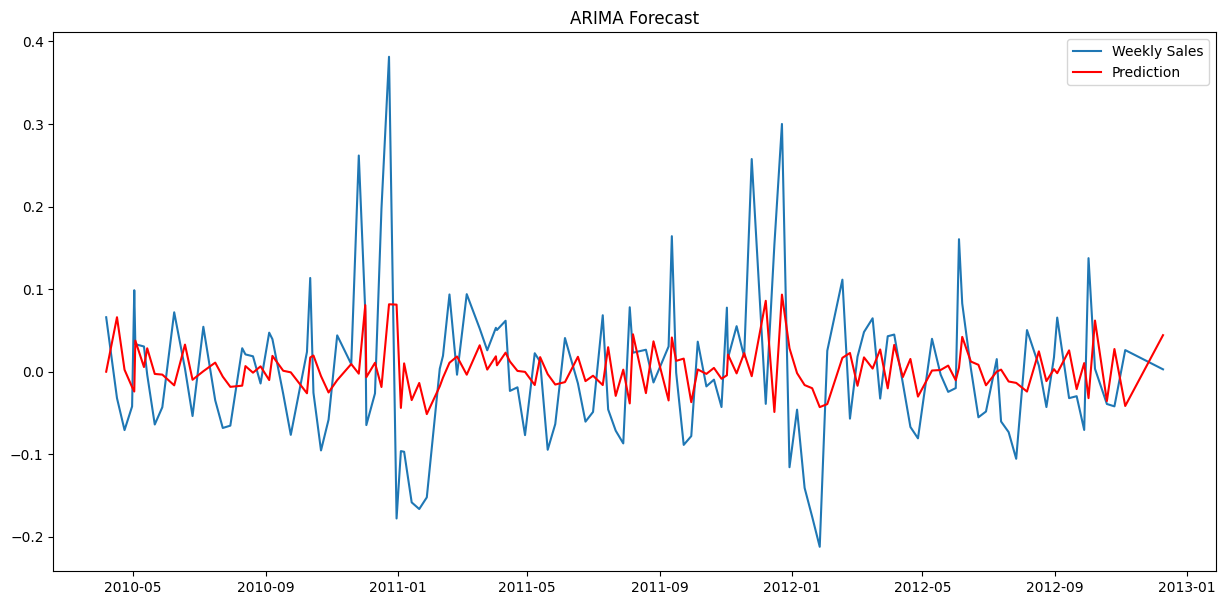

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df_new,label='Weekly Sales')
plt.plot(prediction,color='red', label='Prediction')
plt.title('ARIMA Forecast')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_new,prediction)
mse

0.007455993751913826

In [ ]:
rmse = np.sqrt(mse)
rmse

0.08634809640005868

In [ ]:
forecast_mth = 12
forecast = model_fit.forecast(steps=forecast_mth)
end_date = '2012-12-10'

In [ ]:
forcast_start_date = pd.to_datetime(end_date) + pd.DateOffset(weeks=0)
forcast_end_date = forcast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forcast_start_date,end=forcast_end_date,freq='W')

In [ ]:
forecast_dates

DatetimeIndex(['2012-12-16', '2012-12-23', '2012-12-30', '2013-01-06',
               '2013-01-13', '2013-01-20', '2013-01-27', '2013-02-03',
               '2013-02-10', '2013-02-17', '2013-02-24', '2013-03-03'],
              dtype='datetime64[ns]', freq='W-SUN')

In [ ]:
# forecasted sales
forecast_df = pd.DataFrame({'Date':forecast_dates,'Weekly_Sales':forecast})
forecast_df.set_index('Date',inplace=True)
forecast_df

,Weekly_Sales
Date,
2012-12-16,-0.035635
2012-12-23,0.027777
2012-12-30,-0.022050
2013-01-06,0.021976
2013-01-13,-0.016013
2013-01-20,0.016919
2013-01-27,-0.011603
2013-02-03,0.013104
2013-02-10,-0.008298


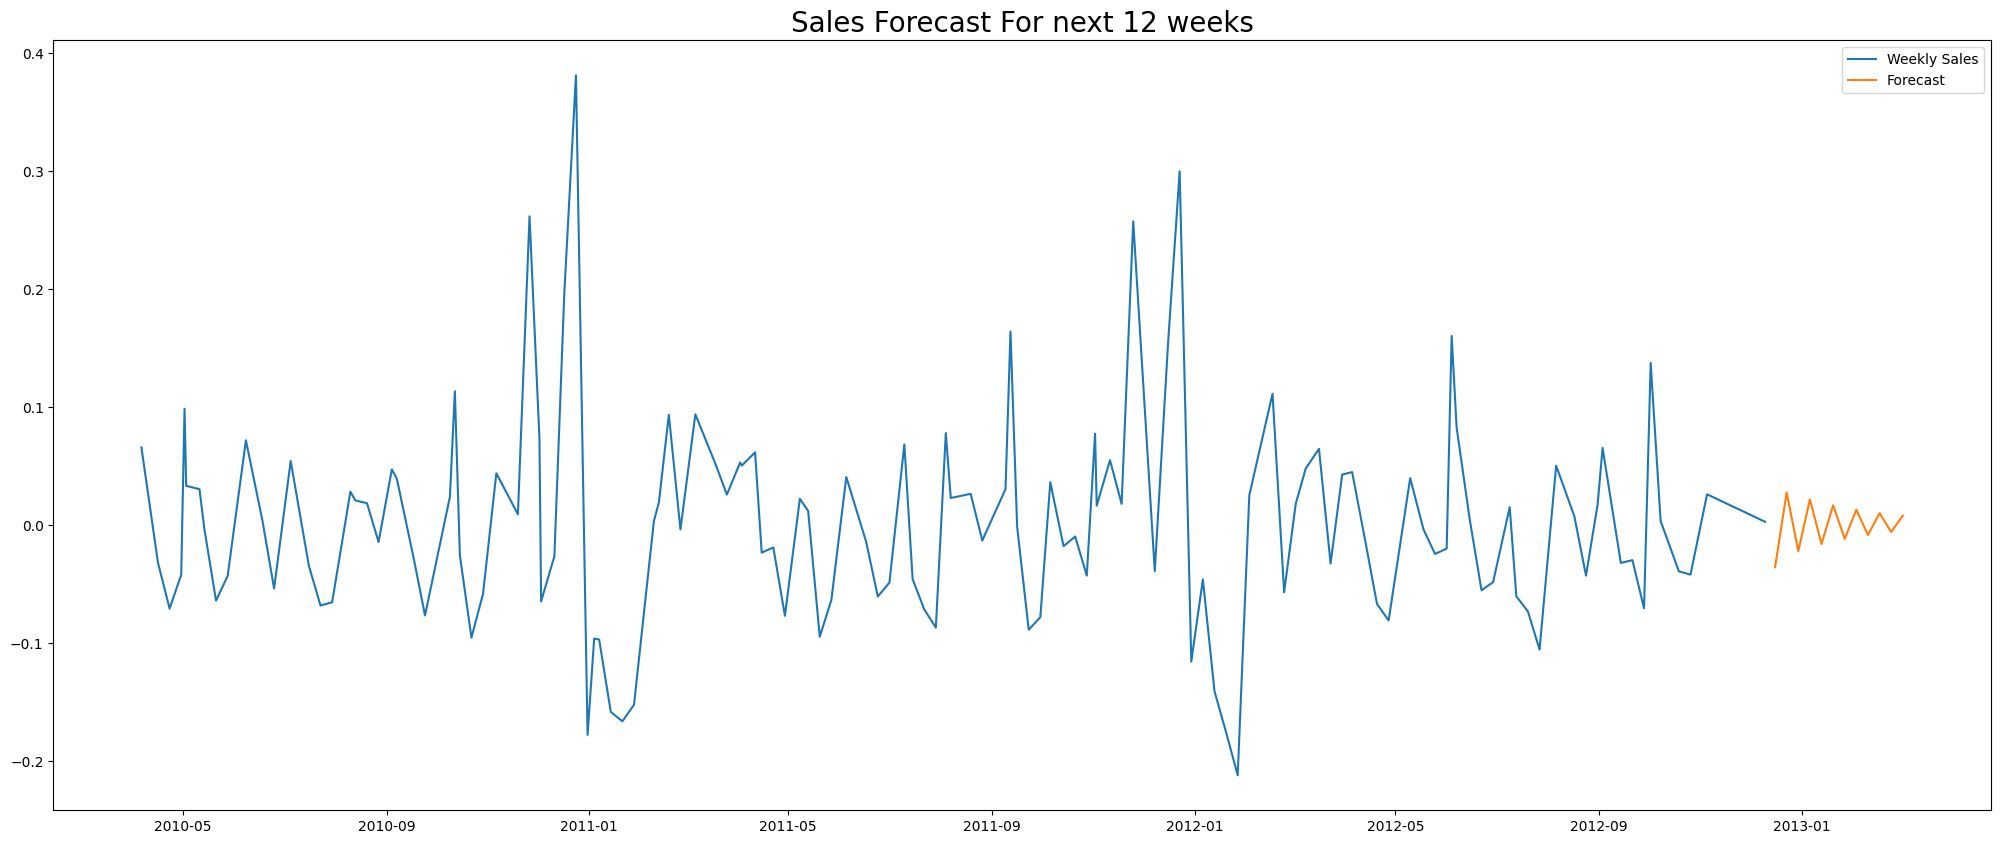

In [ ]:
# Sales Forecast For Next 12 weeks
plt.figure(figsize=(25,10))
plt.plot(df_new,label='Weekly Sales')
plt.plot(forecast_df['Weekly_Sales'],label='Forecast')
plt.title('Sales Forecast For next 12 weeks',fontsize=20)
plt.legend()
plt.show()